In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### import combine data
data = pd.read_csv('combine_stats.csv')
print(data.shape)
print(data.info())
data.head(3)

(7184, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7184 entries, 0 to 7183
Data columns (total 13 columns):
Year             7184 non-null int64
Name             7184 non-null object
College          7180 non-null object
Position         7184 non-null object
Height           7184 non-null float64
Weight           7184 non-null int64
Wonderlic        345 non-null float64
40_yard_dash     7184 non-null float64
Bench_Press      3844 non-null float64
Vertical_Jump    4259 non-null float64
Broad_Jump       4204 non-null float64
Shuttle          7184 non-null float64
3Cone            7184 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 729.7+ KB
None


,Year,Name,College,Position,Height,Weight,Wonderlic,40_yard_dash,Bench_Press,Vertical_Jump,Broad_Jump,Shuttle,3Cone
0,2004,Derek Abney,Kentucky,WR,69.3,179,NaN,9.99,NaN,33.5,120.0,4.08,6.89
1,2004,Nathaniel Adibi,Virginia Tech,DE,75.3,254,NaN,9.99,NaN,33.0,118.0,4.36,9.99
2,2004,Roc Alexander,Washington,CB,71.0,185,NaN,9.99,NaN,39.5,125.0,4.23,6.97


In [3]:
### wonderlic has mostly null so going to drop it
data.drop('Wonderlic', axis=1, inplace=True)

In [4]:
### position breakdown
data.groupby('Position').size()

Position
C      215
CB     739
DB       4
DE     559
DL       4
DT     561
EDG     22
FB     140
FS     305
ILB    305
K       90
LB      48
LS      20
NT       1
OG     420
OL      10
OLB    529
OT     528
P      101
QB     393
RB     577
S       29
SS     256
TE     383
WR     945
dtype: int64

In [5]:
### looks like we will want to clean up and group some positions
#data[data['Position']=='EDG']
### this appears to be a new thing as of 2019
### Google search: "It's because EDGE can refer to any player that is a pass rusher on the outside. 
### So if you think a player can play either 3-4 OLB or 4-3 DE, 
### which are very similar positions, you can just say "EDGE" to get both.""

In [6]:
#### create mapping for position change
position_map = [('DB','CB'),('DL','DT'),('ILB','LB'),('OLB','LB'),
               ('P','K'),('LS','C'),('FS','S'),('SS','S'),('NT','DT'),
               ('OL','OT'),('SAF','S'),('MLB','LB'),('T','OT'),
               ('G','OG')]
for k, v in position_map:
    data['Position'].replace(k,v,inplace=True)

### position breakdown
data.groupby('Position').size()

Position
C      235
CB     743
DE     559
DT     566
EDG     22
FB     140
K      191
LB     882
OG     420
OT     538
QB     393
RB     577
S      590
TE     383
WR     945
dtype: int64

In [7]:
### look into column stats
data.describe()

,Year,Height,Weight,40_yard_dash,Bench_Press,Vertical_Jump,Broad_Jump,Shuttle,3Cone
count,7184.000000,7184.000000,7184.000000,7184.000000,3844.000000,4259.000000,4204.000000,7184.000000,7184.000000
mean,2012.610663,73.803039,242.815423,6.119864,20.817898,32.722658,114.257136,7.139985,8.656205
std,4.608221,2.640641,45.281869,2.283789,6.454277,4.261431,9.325594,2.802393,1.392641
min,2004.000000,61.875000,149.000000,4.210000,2.000000,17.500000,73.000000,3.750000,6.280000
25%,2009.000000,71.875000,205.000000,4.600000,16.000000,30.000000,109.000000,4.350000,7.180000
50%,2013.000000,74.000000,233.000000,4.890000,21.000000,33.000000,115.000000,5.015000,9.990000
75%,2017.000000,75.750000,283.000000,9.990000,25.000000,35.500000,121.000000,9.990000,9.990000
max,2019.000000,81.630000,385.000000,9.990000,49.000000,46.000000,147.000000,9.990000,9.990000


In [8]:
### 40 yard dash, shuttle, 3 cone drill all have 75% as 9.99, most likely encoding for missing value
### going to replace with nan
data['40_yard_dash'].replace(9.99, np.nan, inplace=True)
data['Shuttle'].replace(9.99, np.nan, inplace=True)
data['3Cone'].replace(9.99, np.nan, inplace=True)
data.describe()

,Year,Height,Weight,40_yard_dash,Bench_Press,Vertical_Jump,Broad_Jump,Shuttle,3Cone
count,7184.000000,7184.000000,7184.000000,5347.000000,3844.000000,4259.000000,4204.000000,3661.000000,3515.000000
mean,2012.610663,73.803039,242.815423,4.790251,20.817898,32.722658,114.257136,4.397400,7.263974
std,4.608221,2.640641,45.281869,0.304910,6.454277,4.261431,9.325594,0.265459,0.410012
min,2004.000000,61.875000,149.000000,4.210000,2.000000,17.500000,73.000000,3.750000,6.280000
25%,2009.000000,71.875000,205.000000,4.550000,16.000000,30.000000,109.000000,4.200000,6.960000
50%,2013.000000,74.000000,233.000000,4.720000,21.000000,33.000000,115.000000,4.350000,7.170000
75%,2017.000000,75.750000,283.000000,4.990000,25.000000,35.500000,121.000000,4.560000,7.520000
max,2019.000000,81.630000,385.000000,6.000000,49.000000,46.000000,147.000000,5.560000,9.040000


In [9]:
### there are a lot of missing values...see how many rows are fully complete
100 * (1 - data.dropna().shape[0] / data.shape[0])

77.39420935412026

In [10]:
### only 77% of rows are complete...this may be enough but want to consider imputing values
### two ideas come to mind:
### 1) impute median based on position
### 2) impute based on correlation to other recorded values
### look into data to see if possible

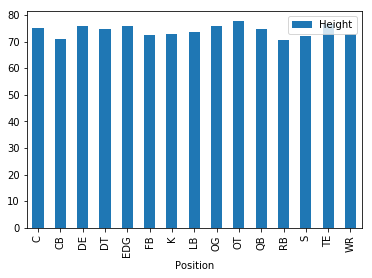

In [11]:
### average height by position
data.groupby('Position').agg({'Height':'mean'}).plot.bar()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


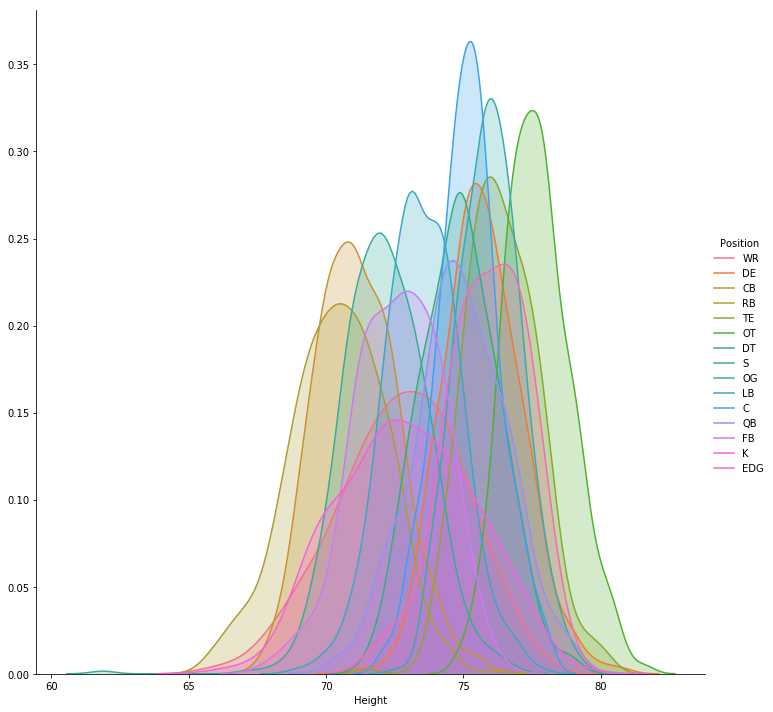

In [12]:
(sns
  .FacetGrid(data, 
             hue='Position',
             height=10)
  .map(sns.kdeplot, 'Height', shade=True)
 .add_legend()
)

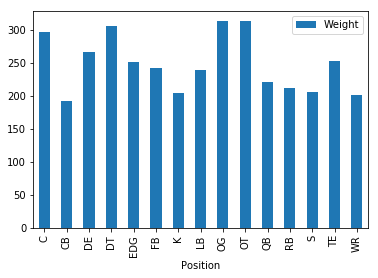

In [13]:
### average weight by position
data.groupby('Position').agg({'Weight':'mean'}).plot.bar()

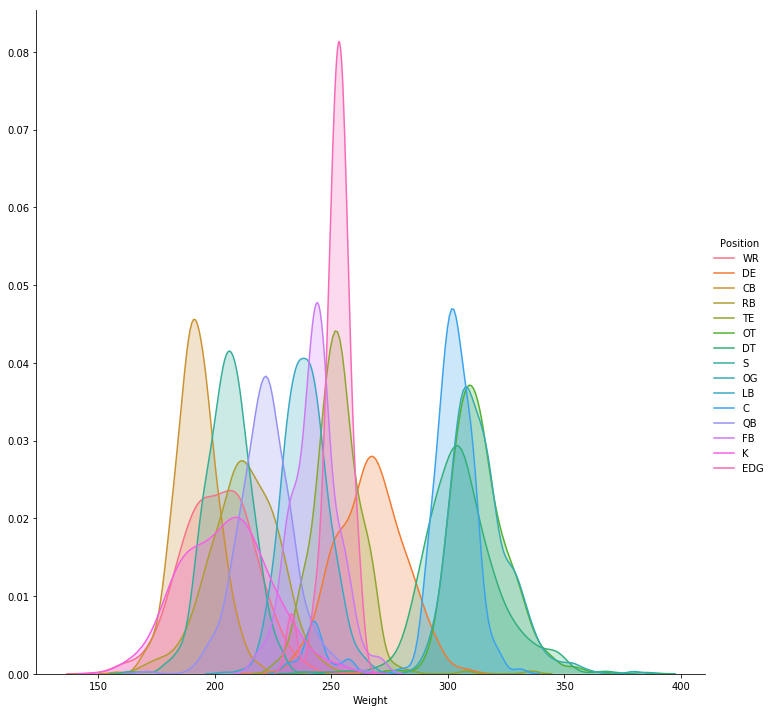

In [14]:
(sns
  .FacetGrid(data, 
             hue='Position',
             height=10)
  .map(sns.kdeplot, 'Weight', shade=True)
 .add_legend()
)

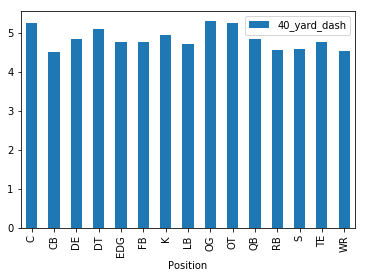

In [15]:
### average 40 yrd dash by position
data.groupby('Position').agg({'40_yard_dash':'median'}).plot.bar()

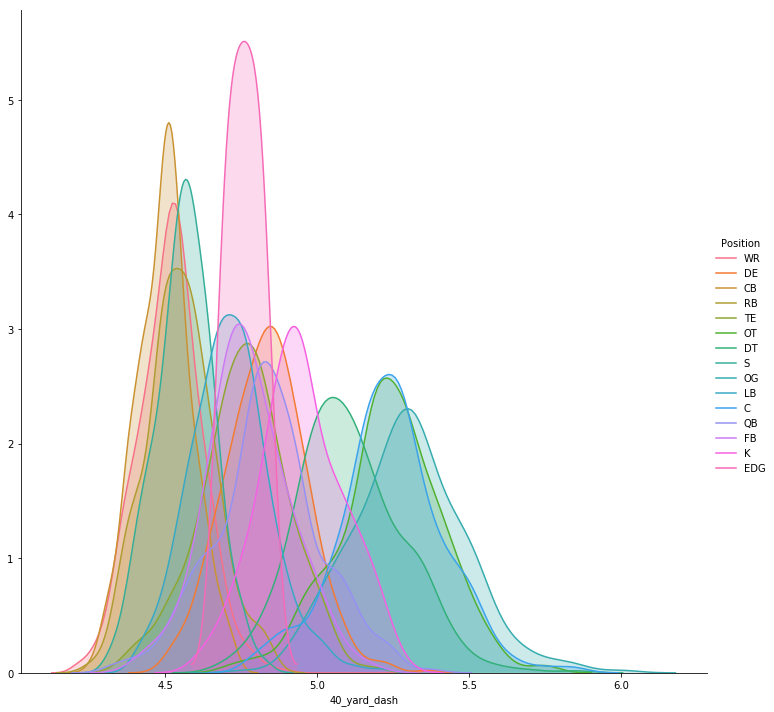

In [16]:
(sns
  .FacetGrid(data, 
             hue='Position',
             height=10)
  .map(sns.kdeplot, '40_yard_dash', shade=True)
 .add_legend()
)

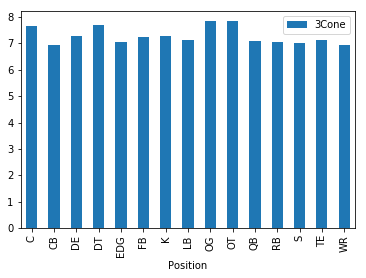

In [17]:
### average 3 Cone by position
data.groupby('Position').agg({'3Cone':'median'}).plot.bar()

/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


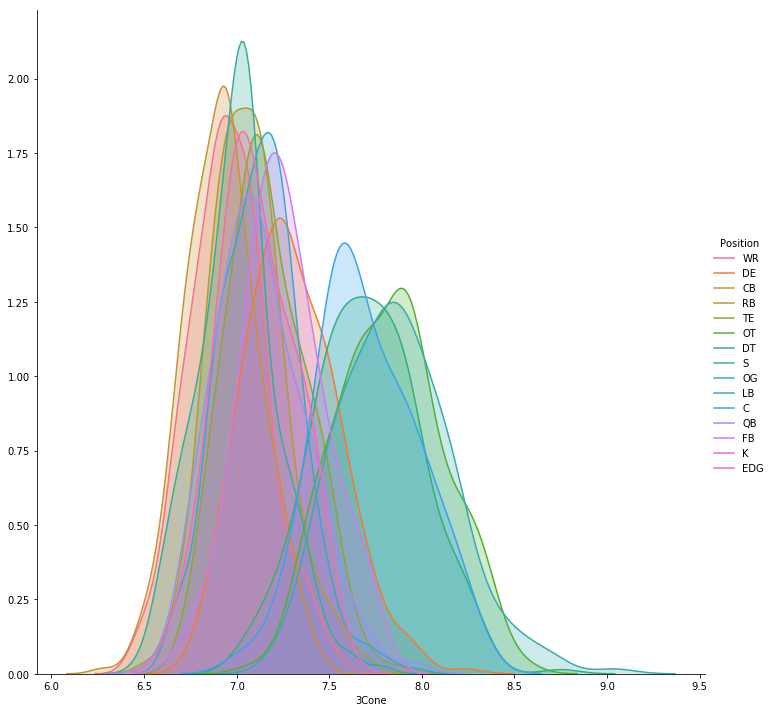

In [18]:
(sns
  .FacetGrid(data, 
             hue='Position',
             height=10)
  .map(sns.kdeplot, '3Cone', shade=True)
 .add_legend()
)

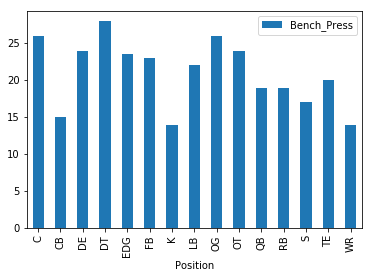

In [19]:
### average Bench Press by position
data.groupby('Position').agg({'Bench_Press':'median'}).plot.bar()

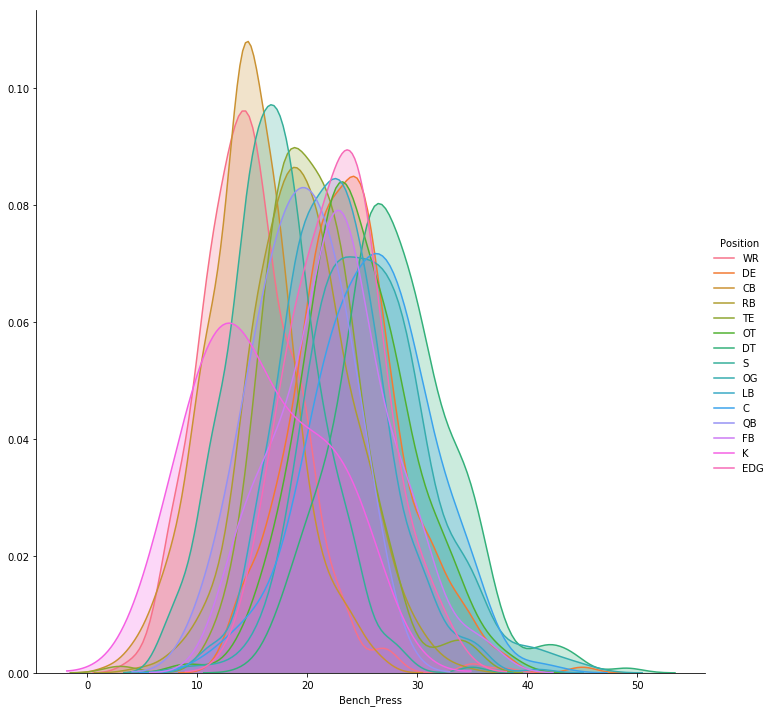

In [20]:
(sns
  .FacetGrid(data, 
             hue='Position',
             height=10)
  .map(sns.kdeplot, 'Bench_Press', shade=True)
 .add_legend()
)

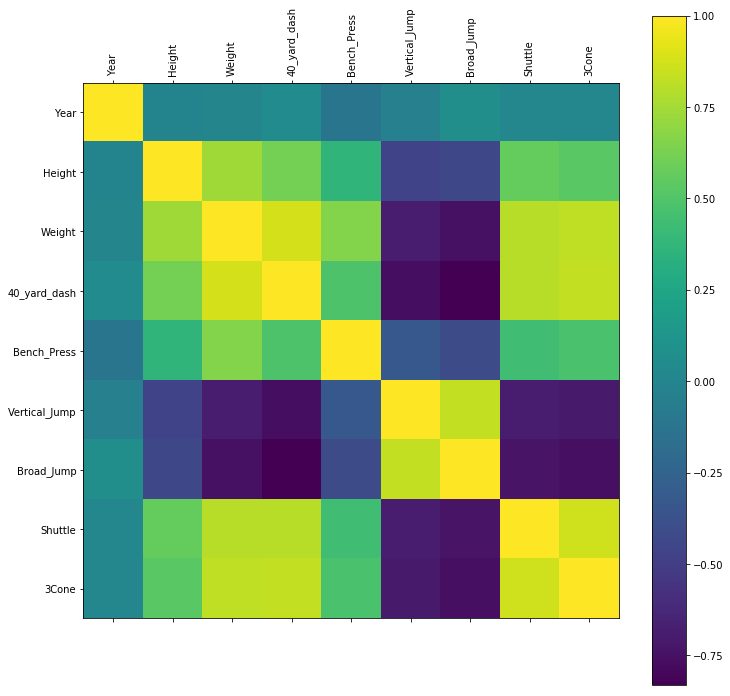

In [21]:
### look into correlation between drills to see if imputation is possible from that
corr_mat = data.dropna().corr()
f = plt.figure(figsize=(12, 12))
plt.matshow(corr_mat, fignum=f.number)
plt.xticks(range(corr_mat.shape[1]), corr_mat.columns, rotation=90)
plt.yticks(range(corr_mat.shape[1]), corr_mat.columns)
plt.colorbar()
plt.show()

In [37]:
### import draft rank
draft_data = pd.read_csv('draft_rank.csv')
print(draft_data.shape)
print(draft_data.info())
draft_data.head(3)

(4071, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4071 entries, 0 to 4070
Data columns (total 6 columns):
Year           4071 non-null int64
Draft_rank     4071 non-null int64
Draft_round    4071 non-null object
Name           4071 non-null object
Position       4071 non-null object
College        4071 non-null object
dtypes: int64(2), object(4)
memory usage: 190.9+ KB
None


,Year,Draft_rank,Draft_round,Name,Position,College
0,2004,1,round1,Eli Manning,QB,Mississippi
1,2004,2,round1,Robert Gallery,T,Iowa
2,2004,3,round1,Larry Fitzgerald,WR,Pittsburgh


In [38]:
draft_data.Draft_round = draft_data.Draft_round.apply(lambda x: x.replace("round",""))
draft_data.head()

,Year,Draft_rank,Draft_round,Name,Position,College
0,2004,1,1,Eli Manning,QB,Mississippi
1,2004,2,1,Robert Gallery,T,Iowa
2,2004,3,1,Larry Fitzgerald,WR,Pittsburgh
3,2004,4,1,Philip Rivers,QB,North Carolina State
4,2004,5,1,Sean Taylor,FS,Miami (Fla.)


In [39]:
### look ino position
draft_data.groupby('Position').size()

Position
--      11
C      105
CB     343
DB     268
DE     337
DL       3
DT     294
FB      33
FS      50
G      218
ILB     28
K       32
KR       1
LB     424
LS       7
MLB     15
NT      19
OG      12
OL       8
OLB     86
OT      29
P       33
QB     193
RB     341
SAF    102
SS      43
T      299
TE     231
WR     506
dtype: int64

In [40]:
### use same mapping as combine data
for k, v in position_map:
    draft_data['Position'].replace(k,v,inplace=True)

### position breakdown
draft_data.groupby('Position').size()

Position
--     11
C     112
CB    611
DE    337
DT    316
FB     33
K      65
KR      1
LB    553
OG    230
OT    336
QB    193
RB    341
S     195
TE    231
WR    506
dtype: int64

In [43]:
draft_data_summ_by_round = draft_data.groupby(['Draft_round','Position']).size()
draft_data_summ_by_round.head(10)

Draft_round  Position
1            C           11
             CB          69
             DE          59
             DT          48
             LB          62
             OG          14
             OT          63
             QB          47
             RB          36
             S           24
dtype: int64

In [45]:
### need to merge the two datasets together, name is how but want to check to make sure all are unique
len(set(draft_data.Name)) / len(draft_data.Name)

0.9889462048636699

In [46]:
len(set(data.Name)) / len(data.Name)

0.9782850779510023

In [55]:
### appears that all names are not unique...try concatenating position
name_pos = draft_data.Name + draft_data.Position
print(name_pos[:5])
print(len(set(name_pos)) / len(draft_data.Name))
pd.Series(name_pos).value_counts().head(10)

0         Eli ManningQB
1      Robert GalleryOT
2    Larry FitzgeraldWR
3       Philip RiversQB
4          Sean TaylorS
dtype: object
0.9980348808646524


Mike WilliamsWR      3
Zach MillerTE        2
Peter KalambayiLB    2
Mike ThomasWR        2
Ryan SmithCB         2
Connor McGovernOG    2
Chris JonesDT        2
Juan ThornhillCB     1
Isaac AsiataOG       1
Stanley HaviliRB     1
dtype: int64

In [56]:
draft_data[draft_data.Name == "Peter Kalambayi"]

,Year,Draft_rank,Draft_round,Name,Position,College
3773,2018,214,6,Peter Kalambayi,LB,Stanford
3774,2018,214,6,Peter Kalambayi,LB,Stanford


In [57]:
draft_data[draft_data.Name == "Mike Williams"]

,Year,Draft_rank,Draft_round,Name,Position,College
264,2005,10,1,Mike Williams,WR,USC
1627,2010,101,4,Mike Williams,WR,Syracuse
3313,2017,7,1,Mike Williams,WR,Clemson


In [61]:
###also adding year
name_pos_year = draft_data.Name + draft_data.Position + draft_data.Year.astype(str)
print(name_pos_year[:5])
print(len(set(name_pos_year)) / len(draft_data.Name))
pd.Series(name_pos_year).value_counts().head()

0         Eli ManningQB2004
1      Robert GalleryOT2004
2    Larry FitzgeraldWR2004
3       Philip RiversQB2004
4          Sean TaylorS2004
dtype: object
0.9997543601080816


Peter KalambayiLB2018    2
Kentwan BalmerDE2008     1
David ClowneyWR2007      1
Wes SchweitzerOG2016     1
Kendrick LewisS2010      1
dtype: int64

In [62]:
### need to drop duplicates from original data
draft_data = draft_data.drop_duplicates()

In [63]:
###also adding year
name_pos_year = draft_data.Name + draft_data.Position + draft_data.Year.astype(str)
print(name_pos_year[:5])
print(len(set(name_pos_year)) / len(draft_data.Name))
pd.Series(name_pos_year).value_counts().head()

0         Eli ManningQB2004
1      Robert GalleryOT2004
2    Larry FitzgeraldWR2004
3       Philip RiversQB2004
4          Sean TaylorS2004
dtype: object
1.0


Kentwan BalmerDE2008    1
Kevin WhiteWR2015       1
Wes SchweitzerOG2016    1
Kendrick LewisS2010     1
Jason ShirleyDT2008     1
dtype: int64

In [71]:
#### same thing for combine data
### need to drop duplicates from original data
data = data.drop_duplicates()
###also adding year
name_pos_year = data.Name + data.Position + data.Year.astype(str)
print(name_pos_year[:5])
print(len(set(name_pos_year)) / len(data.Name))
pd.Series(name_pos_year).value_counts().head(50)

0        Derek AbneyWR2004
1    Nathaniel AdibiDE2004
2      Roc AlexanderCB2004
3        Rich AlexisRB2004
4        Jared AllenDE2004
dtype: object
0.9966592427616926


Zach MooreDE2014              2
Ali MarpetOG2015              2
Vincent BrownWR2011           2
Lawrence SidburyDE2009        2
JaWuan JamesOT2014            2
Austen LaneDE2010             2
Todd WashingtonCB2014         2
Rakeem Nunez-RochesDT2015     2
Dorial Green-BeckhamWR2015    2
Nate TheakerOG2017            2
Hroniss GrasuC2015            2
Robert AlfordCB2013           2
LeKevin SmithDT2006           2
DeAnthony ThomasRB2014        2
Greg ReidCB2013               2
Adam SnyderOG2005             2
Jordan MorganOG2017           2
Cecil ShortsWR2011            2
Khalid WootenCB2013           2
Derrick RossRB2006            2
Kevin HughesOT2011            2
Walter PowellWR2014           2
KaDeem CareyRB2014            2
Chad NkangS2007               2
Trevor DanielK2018            1
Mike PurcellDT2013            1
Xavier WoodsS2017             1
Kevin KolbQB2007              1
Keenan RobinsonLB2012         1
Bennie LoganDT2013            1
Collin BevinsDE2017           1
Jacob Ta

In [67]:
data[data.Name == 'JaWuan James']

,Year,Name,College,Position,Height,Weight,40_yard_dash,Bench_Press,Vertical_Jump,Broad_Jump,Shuttle,3Cone
3831,2014,JaWuan James,Oklahoma,OT,78.0,311,NaN,22.0,29.0,103.0,4.56,7.42
3832,2014,JaWuan James,Tennessee,OT,78.0,311,5.34,22.0,29.0,102.0,4.56,7.42


In [69]:
data[data.Name == 'Ali Marpet']

,Year,Name,College,Position,Height,Weight,40_yard_dash,Bench_Press,Vertical_Jump,Broad_Jump,Shuttle,3Cone
4482,2015,Ali Marpet,Hobart & William Smith (NY),OG,75.880,307,4.98,30.0,30.5,108.0,4.47,7.33
4483,2015,Ali Marpet,Hobart & William Smith (NY),OG,75.875,307,NaN,30.0,30.5,108.0,4.47,7.33


In [72]:
data[data.Name == 'KaDeem Carey']

,Year,Name,College,Position,Height,Weight,40_yard_dash,Bench_Press,Vertical_Jump,Broad_Jump,Shuttle,3Cone
3716,2014,KaDeem Carey,Arizona,RB,69.380,207,4.7,19.0,32.5,114.0,4.38,7.08
3717,2014,KaDeem Carey,North Carolina State,RB,69.375,207,NaN,19.0,32.5,115.0,4.38,7.08


In [82]:
### there doesn't seem to be a consistent way to fix these...since it is only a tiny fraction of the data
### going to drop these rows
data['merge'] = data.Name + data.Position + data.Year.astype(str)
values_to_drop = data['merge'].value_counts()[data['merge'].value_counts() >= 2]
indices_to_drop = [index for index in data.index.values if data['merge'][index] in values_to_drop]
print(data.shape)
data.drop(indices_to_drop,inplace=True)
data.shape

(7184, 13)


(7136, 13)

In [85]:
### create merge column on draft data
draft_data['merge'] = draft_data.Name + draft_data.Position + draft_data.Year.astype(str)
print(draft_data.shape)
draft_data.head()

(4070, 7)


,Year,Draft_rank,Draft_round,Name,Position,College,merge
0,2004,1,1,Eli Manning,QB,Mississippi,Eli ManningQB2004
1,2004,2,1,Robert Gallery,OT,Iowa,Robert GalleryOT2004
2,2004,3,1,Larry Fitzgerald,WR,Pittsburgh,Larry FitzgeraldWR2004
3,2004,4,1,Philip Rivers,QB,North Carolina State,Philip RiversQB2004
4,2004,5,1,Sean Taylor,S,Miami (Fla.),Sean TaylorS2004


In [86]:
### merge draft data on to combine data....may also try to predict whether someone got drafted
final_data = data.merge(draft_data, how='left', on='merge')
print(final_data.shape)
final_data.head()

(7136, 19)


,Year_x,Name_x,College_x,Position_x,Height,Weight,40_yard_dash,Bench_Press,Vertical_Jump,Broad_Jump,Shuttle,3Cone,merge,Year_y,Draft_rank,Draft_round,Name_y,Position_y,College_y
0,2004,Derek Abney,Kentucky,WR,69.3,179,NaN,NaN,33.5,120.0,4.08,6.89,Derek AbneyWR2004,2004.0,244.0,7,Derek Abney,WR,Kentucky
1,2004,Nathaniel Adibi,Virginia Tech,DE,75.3,254,NaN,NaN,33.0,118.0,4.36,NaN,Nathaniel AdibiDE2004,2004.0,145.0,5,Nathaniel Adibi,DE,Virginia Tech
2,2004,Roc Alexander,Washington,CB,71.0,185,NaN,NaN,39.5,125.0,4.23,6.97,Roc AlexanderCB2004,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,Rich Alexis,Washington,RB,72.0,210,NaN,NaN,32.0,114.0,4.43,7.41,Rich AlexisRB2004,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,Jared Allen,Idaho State,DE,78.0,265,NaN,13.0,33.0,120.0,4.34,7.11,Jared AllenDE2004,2004.0,126.0,4,Jared Allen,DE,Idaho State


In [93]:
### create new column for draft y/n
final_data['drafted'] = [0 if pd.isna(x) else 1 for x in final_data.Draft_round]
final_data.drafted.value_counts()

0    3836
1    3300
Name: drafted, dtype: int64